# Testing out some distributions in Tensorflow Probability

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import tensorflow_probability as tfp
import pandas as pd
tfd = tfp.distributions
sns.reset_defaults()
sns.set_context(context='talk',font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format='retina'

#### Univariate normal

In [28]:
uv_normal = tfd.Normal(loc=0., scale=1.)

In [29]:
uv_normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [32]:
samples = uv_normal.sample(1000)

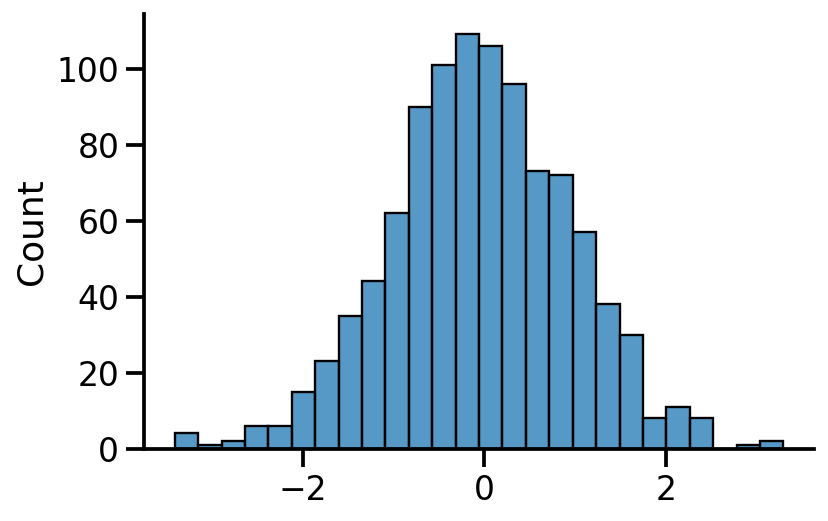

In [33]:
sns.histplot(samples.numpy())
sns.despine()

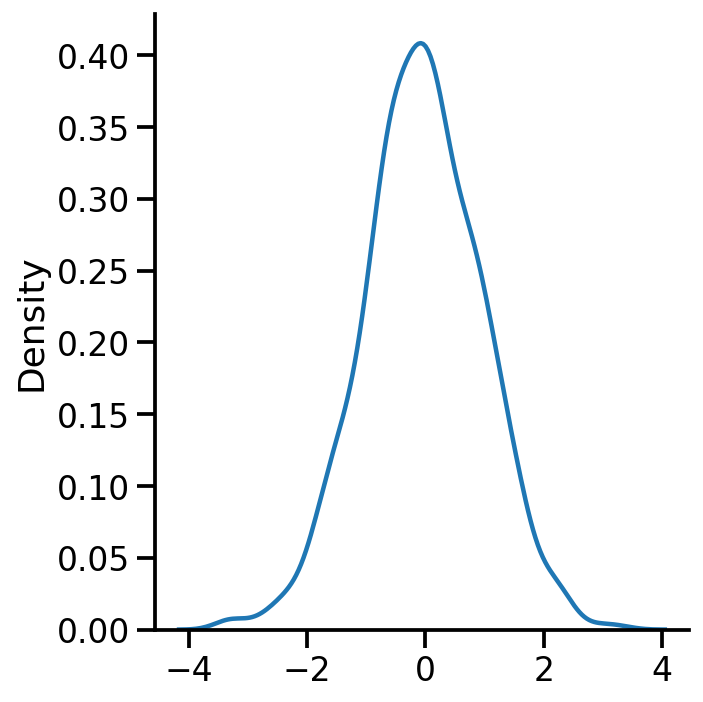

In [37]:
sns.displot(samples.numpy(), kind='kde')

In [60]:
uv_normal_dict_mean = {x: tfd.Normal(loc=x, scale=1.) for x in [-2, -1, 0, 1, 2]}

In [61]:
uv_normal_dict_mean_samples = pd.DataFrame({x:uv_normal_dict_mean[x].sample(10000).numpy() 
                                            for x in uv_normal_dict_mean})

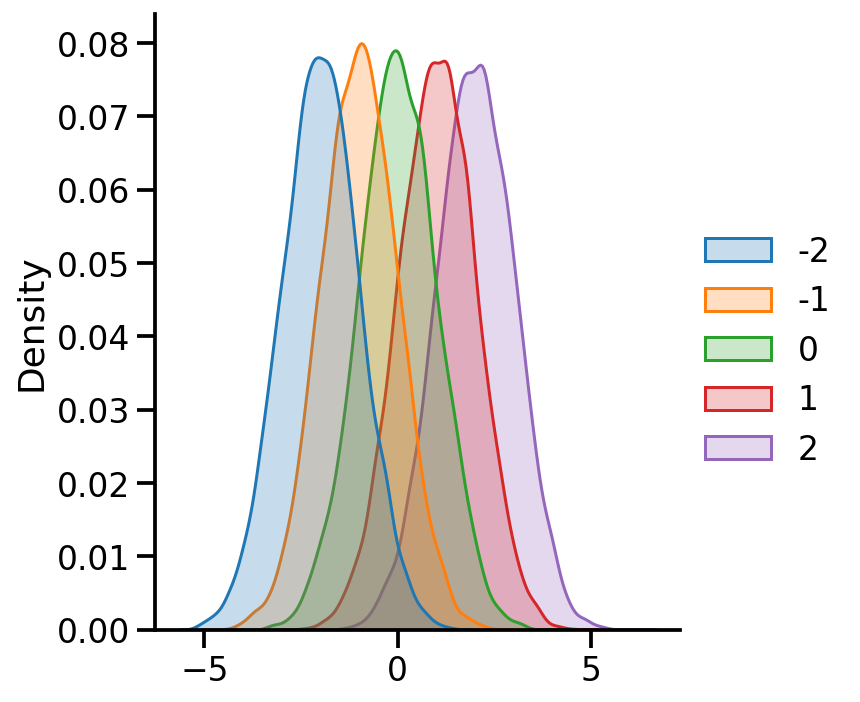

In [62]:
sns.displot(uv_normal_dict_mean_samples, kind='kde', fill=True)

In [70]:
uv_normal_dict_var = {x: tfd.Normal(loc=0, scale=x) for x in [1, 2, 5, 10]}
uv_normal_dict_var_samples = pd.DataFrame({x:uv_normal_dict_var[x].sample(10000).numpy() 
                                            for x in uv_normal_dict_var})

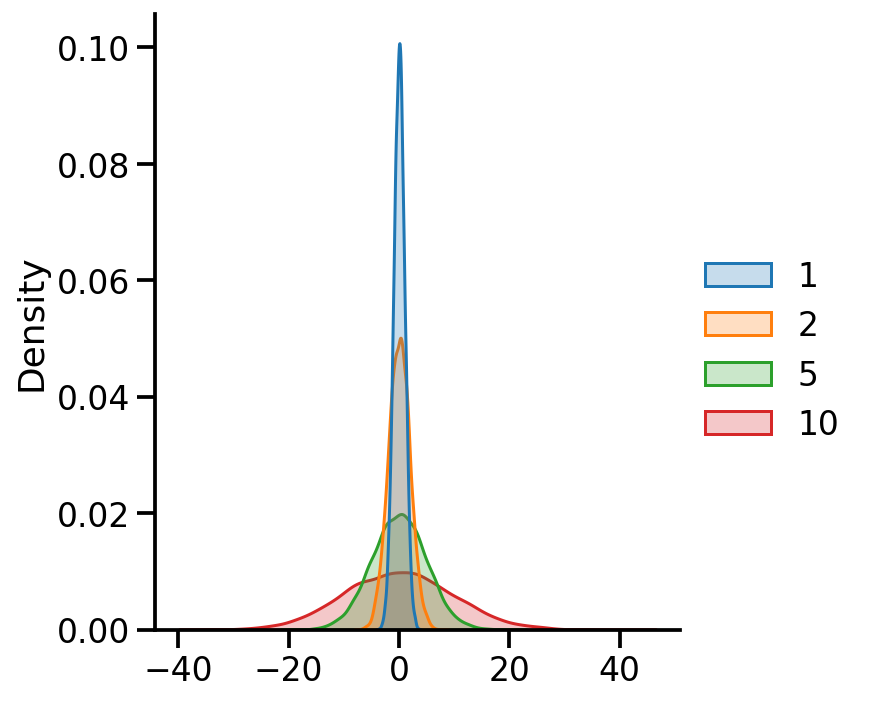

In [71]:
sns.displot(uv_normal_dict_var_samples, kind='kde', fill=True)

### Using batches 

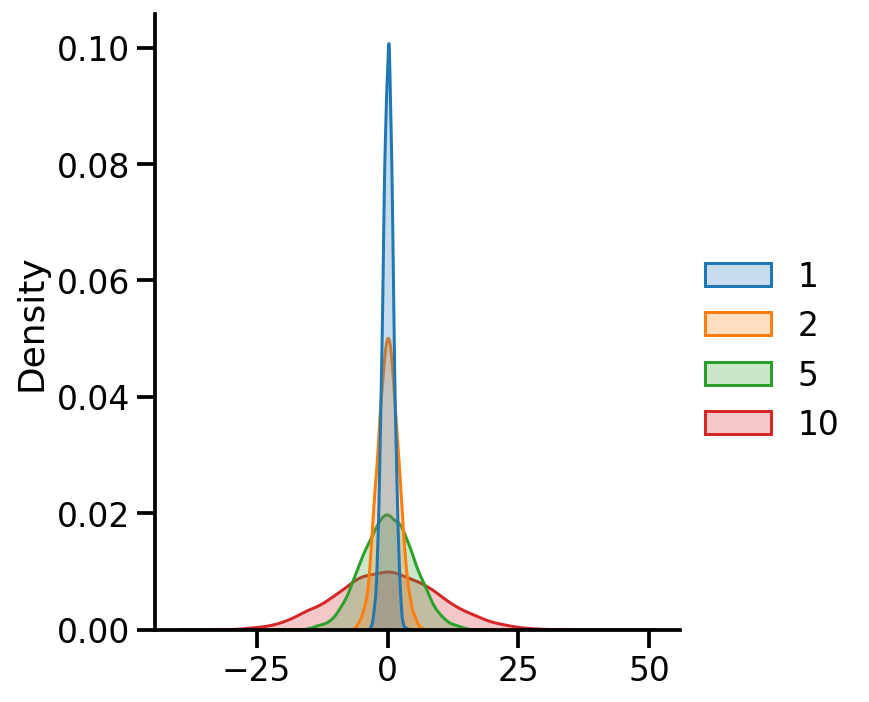

In [101]:
var_dfs = pd.DataFrame(
    tfd.Normal(loc=[0., 0., 0., 0.],
               scale=[1., 2., 5., 10.]).sample(10000).numpy())
var_dfs.columns = [1, 2, 5, 10]
sns.displot(var_dfs, kind='kde', fill=True)


In [103]:
tfd.Normal(loc=[0., 0., 0., 0.],
               scale=[1., 2., 5., 10.])

<tfp.distributions.Normal 'Normal' batch_shape=[4] event_shape=[] dtype=float32>

Text(0.5, 1.0, 'Density at x = 0.5 is 0.35\n Logprob at x = 0.5 is -1.04')

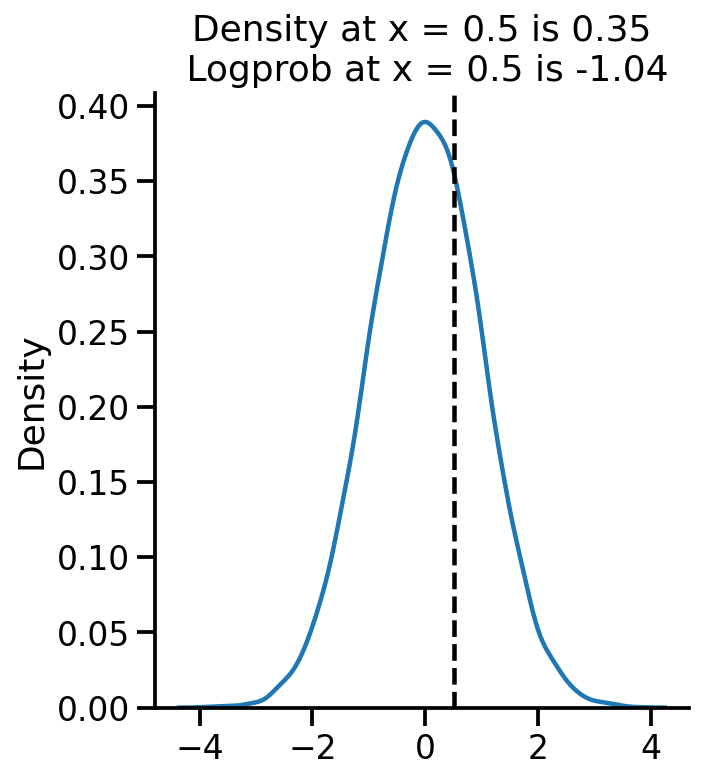

In [83]:
samples = uv_normal.sample(10000)
sns.displot(samples.numpy(), kind='kde')
plt.axvline(0.5, color='k', linestyle='--')
pdf_05 = uv_normal.prob(0.5).numpy()
log_pdf_05 = uv_normal.log_prob(0.5).numpy()


plt.title("Density at x = 0.5 is {:.2f}\n Logprob at x = 0.5 is {:.2f}".format(pdf_05, log_pdf_05))

#### Student-T

In [180]:
st = tfd.StudentT(df=[5, 10, 15,], loc=0, scale=1).sample(10000).numpy()

In [181]:
st_df = pd.DataFrame(x, columns=[5, 10, 15])

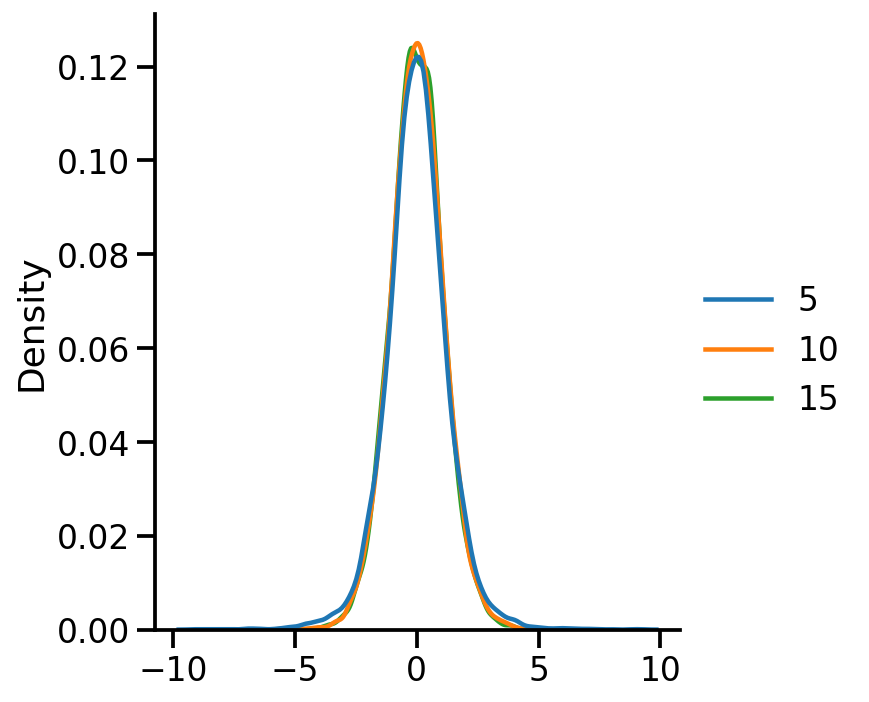

In [183]:
sns.displot(x2, kind='kde', fill=False)

#### Multivariate Normal

In [104]:
mv_normal = tfd.MultivariateNormalFullCovariance(loc=[0, 0], covariance_matrix=[[1, 0.5], [0.5, 2]])

Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


In [119]:
mv_data = pd.DataFrame(mv_normal.sample(10000).numpy())
mv_data.columns = [r'$x_1$', r'$x_2$']


In [121]:
mv_normal.prob([0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.120309845>

In [201]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def make_pdf_2d_gaussian(mu, sigma):
    N = 60
    X = np.linspace(-3, 3, N)
    Y = np.linspace(-3, 4, N)
    X, Y = np.meshgrid(X, Y)

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = tfd.MultivariateNormalFullCovariance(loc=mu, covariance_matrix=sigma)
    Z = F.prob(pos)

    plt.contourf(X, Y, Z, cmap=cm.Purples)
    sns.despine() 
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.gca().set_aspect('equal')
    plt.title(f'$\mu$ = {mu}\n $\Sigma$ = {np.array(sigma)}')

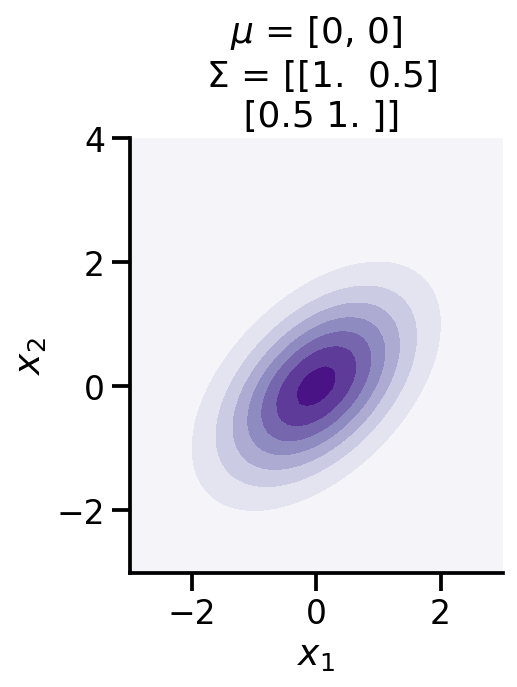

In [202]:
make_pdf_2d_gaussian([0, 0,], [[1, 0.5,], [0.5, 1]])

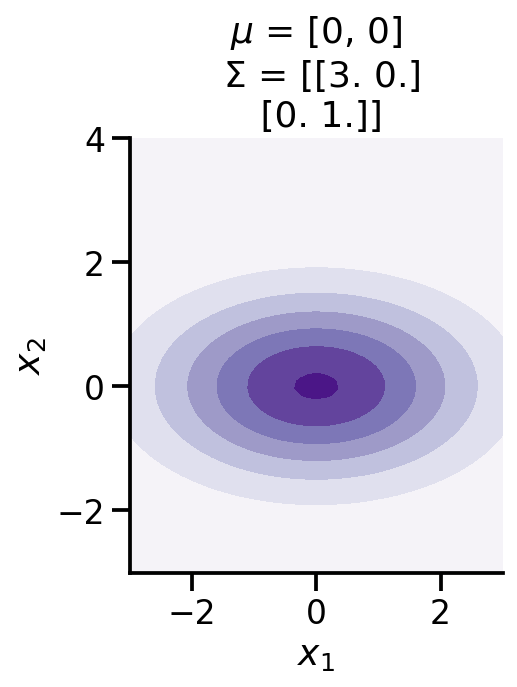

In [203]:
make_pdf_2d_gaussian([0, 0,], [[3, 0.,], [0., 1]])